In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from models import *
from utils import *

In [2]:
# Load data
train = np.genfromtxt('./data/training.csv', delimiter=',')
test = np.genfromtxt('./data/testing.csv', delimiter=',')

# Training data params
n_classes = 4 # Number of classes 
n_features = train.shape[1]-1 # Number of features

In [3]:
# Divide the training data set
x_train, x_test = train[:,1:], test[:,1:]
y_train, y_test = train[:,0].astype(int), test[:,0].astype(int)
y_train, y_test = one_hot(y_train, n_classes), one_hot(y_test, n_classes) # One hot encoding

# Add bias
np.hstack((np.ones((x_train.shape[0],1)), x_train))
np.hstack((np.ones((x_test.shape[0],1)), x_test))
n_features = x_train.shape[1] # Update the value of the number of features 

# Preprocessing - Standarization - zero mean and unit variance
# Recall that the mean and std come from the training set  
x_train, x_test = standarization(x_train, x_test) 

In [4]:
# # Delete highly correlated columns

# cor = corr2_coeff(x_train.T, x_train.T)
# p = np.argwhere(np.triu(np.greater(cor,0.95),1))
# x_train = np.delete(x_train, p[:,1], axis=1)
# x_test = np.delete(x_test, p[:,1], axis=1)
# n_features = train.shape[1] # Update the value of the number of features 

## 1.4 Multinomial logistic regression - Newton's method 

iter : 10/100 - train_loss = 92.19, train_acc = 0.98, test_loss = 242.80, test_acc = 0.77
iter : 20/100 - train_loss = 36.02, train_acc = 0.99, test_loss = 195.30, test_acc = 0.79
iter : 30/100 - train_loss = 14.24, train_acc = 1.00, test_loss = 190.94, test_acc = 0.81
iter : 40/100 - train_loss = 5.56, train_acc = 1.00, test_loss = 209.53, test_acc = 0.82
iter : 50/100 - train_loss = 2.15, train_acc = 1.00, test_loss = 241.91, test_acc = 0.82
iter : 60/100 - train_loss = 0.82, train_acc = 1.00, test_loss = 283.65, test_acc = 0.81
iter : 70/100 - train_loss = 0.31, train_acc = 1.00, test_loss = 332.30, test_acc = 0.81
iter : 80/100 - train_loss = 0.12, train_acc = 1.00, test_loss = 386.07, test_acc = 0.81
iter : 90/100 - train_loss = 0.04, train_acc = 1.00, test_loss = 443.55, test_acc = 0.81
iter : 100/100 - train_loss = 0.02, train_acc = 1.00, test_loss = 503.68, test_acc = 0.81



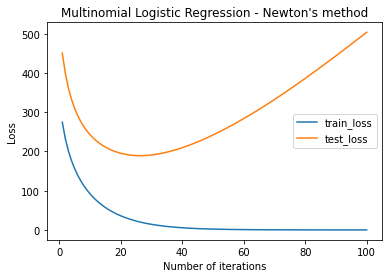

In [7]:
max_iters = 100 # Maximum number of iterations
alpha = 0.1 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = newtons_method2(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=10)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - Newton\'s method' )
plt.legend();

## Ex 1.5 - Multinomial logistic regression - GD

iter : 100/1000 - train_loss = 106.12, train_acc = 0.89, test_loss = 231.33, test_acc = 0.78
iter : 200/1000 - train_loss = 72.75, train_acc = 0.93, test_loss = 207.01, test_acc = 0.81
iter : 300/1000 - train_loss = 58.46, train_acc = 0.93, test_loss = 201.01, test_acc = 0.81
iter : 400/1000 - train_loss = 50.42, train_acc = 0.93, test_loss = 200.38, test_acc = 0.82
iter : 500/1000 - train_loss = 45.22, train_acc = 0.93, test_loss = 202.03, test_acc = 0.82
iter : 600/1000 - train_loss = 41.55, train_acc = 0.93, test_loss = 204.86, test_acc = 0.83
iter : 700/1000 - train_loss = 38.81, train_acc = 0.94, test_loss = 208.37, test_acc = 0.83
iter : 800/1000 - train_loss = 36.69, train_acc = 0.95, test_loss = 212.29, test_acc = 0.82
iter : 900/1000 - train_loss = 34.99, train_acc = 0.95, test_loss = 216.44, test_acc = 0.82
iter : 1000/1000 - train_loss = 33.59, train_acc = 0.95, test_loss = 220.74, test_acc = 0.82



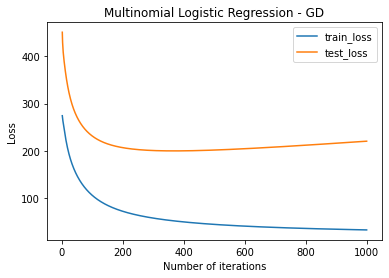

In [8]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - GD')
plt.legend();

## 1.6 - Back tracking Line Search

iter : 100 - train_loss = 9.01, train_acc = 1.00, test_loss = 198.52, test_acc = 0.82
iterations : 118 - train_loss = 9.01, train_acc = 1.00, test_loss = 198.52, test_acc = 0.82


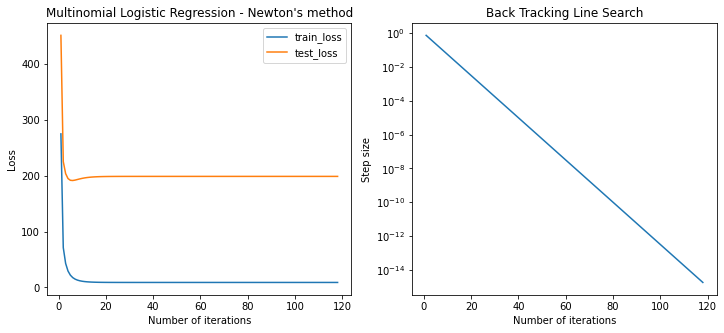

In [23]:
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
rho = 0.75
c = 1e-5

losses_train, losses_test, thetas, alphas = backtracking_line_search(y_train, x_train, y_test, x_test, theta_0, rho, c, print_res_each=100)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - Newton\'s method' )
plt.legend()

plt.subplot(122)
plt.semilogy(range(1,len(alphas)+1), alphas, label = 'alpha')
plt.xlabel('Number of iterations')
plt.ylabel('Step size')
plt.title('Back Tracking Line Search' )
plt.show()


In [8]:
# rhos = np.geomspace(0.05,1e-1,30)
# cs = np.geomspace(1e-11,1e-7,50)

# losses_train_bt = np.zeros((len(rhos),len(cs)))
# losses_test_bt = np.zeros((len(rhos),len(cs)))

# for i,rho in enumerate(rhos):
#     for j,c in enumerate(cs):
#         theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
#         losses_train, losses_test, thetas, alphas = backtracking_line_search(y_train, x_train, y_test, x_test, theta_0, rho, c, print_res_each=100)
#         losses_train_bt[i,j] = losses_train[-1]
#         losses_test_bt[i,j] = losses_test[-1]
        
# (b_rho, b_c) = np.unravel_index(losses_train_bt.argmin(), losses_train_bt.shape)
# print('Train - Best rho:{}, Best c:{}, Train loss:{}, Test loss:{}'.format(rhos[b_rho], cs[b_c], losses_train_bt[b_rho,b_c], losses_test_bt[b_rho,b_c]))
# (b_rho, b_c) = np.unravel_index(losses_test_bt.argmin(), losses_test_bt.shape)
# print('Test - Best rho:{}, Best c:{}, Train loss:{}, Test loss:{}'.format(rhos[b_rho], cs[b_c], losses_train_bt[b_rho,b_c], losses_test_bt[b_rho,b_c]))

## 1.7 - Multinomial logistic regression - SGD

### 1.7.1 SGD - Batch_size = 1

iter : 500/5000 - train_loss = 118.59, train_acc = 0.82, test_loss = 236.37, test_acc = 0.71
iter : 1000/5000 - train_loss = 79.73, train_acc = 0.92, test_loss = 209.19, test_acc = 0.79
iter : 1500/5000 - train_loss = 63.87, train_acc = 0.93, test_loss = 202.70, test_acc = 0.81
iter : 2000/5000 - train_loss = 75.18, train_acc = 0.91, test_loss = 240.41, test_acc = 0.77
iter : 2500/5000 - train_loss = 49.55, train_acc = 0.95, test_loss = 197.42, test_acc = 0.79
iter : 3000/5000 - train_loss = 41.84, train_acc = 0.95, test_loss = 193.99, test_acc = 0.82
iter : 3500/5000 - train_loss = 38.99, train_acc = 0.95, test_loss = 197.26, test_acc = 0.83
iter : 4000/5000 - train_loss = 49.82, train_acc = 0.92, test_loss = 233.95, test_acc = 0.78
iter : 4500/5000 - train_loss = 40.25, train_acc = 0.94, test_loss = 208.89, test_acc = 0.83
iter : 5000/5000 - train_loss = 34.54, train_acc = 0.96, test_loss = 199.83, test_acc = 0.83



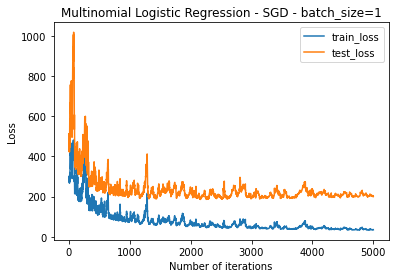

In [9]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.003 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 1 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.2 SGD - Batch_size = 16

iter : 500/5000 - train_loss = 160.98, train_acc = 0.82, test_loss = 283.44, test_acc = 0.76
iter : 1000/5000 - train_loss = 109.40, train_acc = 0.92, test_loss = 234.53, test_acc = 0.77
iter : 1500/5000 - train_loss = 93.51, train_acc = 0.91, test_loss = 219.76, test_acc = 0.78
iter : 2000/5000 - train_loss = 77.55, train_acc = 0.93, test_loss = 204.21, test_acc = 0.81
iter : 2500/5000 - train_loss = 69.40, train_acc = 0.93, test_loss = 203.01, test_acc = 0.81
iter : 3000/5000 - train_loss = 66.24, train_acc = 0.93, test_loss = 205.37, test_acc = 0.80
iter : 3500/5000 - train_loss = 60.23, train_acc = 0.94, test_loss = 202.01, test_acc = 0.81
iter : 4000/5000 - train_loss = 56.82, train_acc = 0.93, test_loss = 200.95, test_acc = 0.81
iter : 4500/5000 - train_loss = 51.32, train_acc = 0.94, test_loss = 197.97, test_acc = 0.82
iter : 5000/5000 - train_loss = 50.18, train_acc = 0.94, test_loss = 200.78, test_acc = 0.82



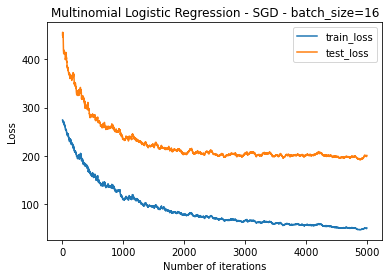

In [10]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 16 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.3 SGD - Batch_size = 32

iter : 100/1000 - train_loss = 100.69, train_acc = 0.90, test_loss = 230.50, test_acc = 0.77
iter : 200/1000 - train_loss = 67.66, train_acc = 0.93, test_loss = 202.78, test_acc = 0.83
iter : 300/1000 - train_loss = 51.03, train_acc = 0.94, test_loss = 194.49, test_acc = 0.81
iter : 400/1000 - train_loss = 47.73, train_acc = 0.93, test_loss = 203.71, test_acc = 0.82
iter : 500/1000 - train_loss = 45.46, train_acc = 0.94, test_loss = 209.54, test_acc = 0.83
iter : 600/1000 - train_loss = 37.10, train_acc = 0.95, test_loss = 203.57, test_acc = 0.82
iter : 700/1000 - train_loss = 40.58, train_acc = 0.94, test_loss = 217.14, test_acc = 0.84
iter : 800/1000 - train_loss = 34.94, train_acc = 0.96, test_loss = 215.89, test_acc = 0.83
iter : 900/1000 - train_loss = 33.21, train_acc = 0.95, test_loss = 219.27, test_acc = 0.83
iter : 1000/1000 - train_loss = 31.63, train_acc = 0.96, test_loss = 225.03, test_acc = 0.83



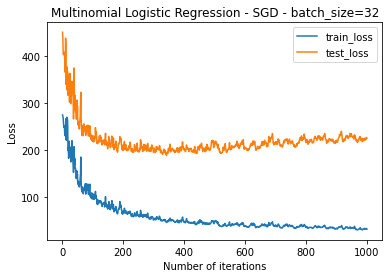

In [11]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0007 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 32 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();